# **<span style="font-family: 'Palatino Linotype', serif;">🧬⚔️ Praticamente um X-Man </span>**
----
*<span style="font-family: 'Angilla Tattoo'"> "Os multiversos colidiram, Maga Patolina não hesitou — ao lado dos X-Man, ela partiu em uma jornada onde feitiçaria e mutação se entrelaçam, desafiando as leis da realidade com o poder ancestral dos patos." 🌠🌀🔥 </span>*

<div align="center">
    <img src = "X-Man.png" alt = "X-Man" width = 350>
</div>

----
 **Objetivo:** Criar um algoritmo de otimização que tenha mais de um operador de mutação. Nesse notebook, iremos resolver o problema do Caixeiro Viajante para 7 cidades. No problema do caixeiro viajente, buscamos encontrar o menor caminho possível entre um número de cidades X, passando por cada cidade somente uma vez e retornando a primeira cidade ao final do trajeto.

In [1]:
import random
import matplotlib.pyplot as plt
from functools import partial

In [2]:
# Código para criar indivíduos (cidades), feito em sala de aula

def cria_cidades(n, xy_minimo=0, xy_maximo=300, semente=12345):
    """Cria um dicionário aleatório de cidades com suas posições (x,y).

    Args:
      n: Número de cidades que serão visitadas pelo caixeiro.
      xy_minimo: Valor mínimo possível das coordenadas x e y.
      xy_maximo: Valor máximo possível das coordenadas x e y.

    """
    random.seed(semente)
    cidades = {}
    num_digitos = len(str(abs(n)))

    for i in range(n):
        cidades[f"Cidade {i:0>{num_digitos}}"] = (
            random.randint(xy_minimo, xy_maximo),
            random.randint(xy_minimo, xy_maximo),
        )

    return cidades

# Código que calcula a distância euclidiana entre pontos (feito em sala de aula)
def dist_euclidiana(coord1, coord2):
    """Computa a distância Euclidiana entre dois pontos em R^2

    Args:
      coord1: lista contendo as coordenadas x e y de um ponto.
      coord2: lista contendo as coordenadas x e y do outro ponto.

    """
    x1 = coord1[0] #pega o índice de X de um ponto 1
    x2 = coord2[0] #índice de X em um ponto 2
    y1 = coord1[1] #índice de Y em um ponto 1
    y2 = coord2[1] #índice de Y em um ponto 2

    distancia = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)

    return distancia

#Função que cria um caminnho possível para o problema, feito em sala de aula
def cria_candidato_caixeiro(cidades):
    """Sorteia um caminho possível no problema do caixeiro viajante

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    nomes_cidades = list(cidades.keys())
    caminho = random.sample(nomes_cidades, k=len(nomes_cidades))
    return caminho

# Cria uma população, ou seja, um conjunto de X grupos de Y cidades, feito em sala de aula
def populacao_caixeiro(tamanho_populacao, cidades):
    """Cria uma população no problema do caixeiro viajante

    Args:
      tamanho_populacao: tamanho da população.
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    populacao = []

    for _ in range(tamanho_populacao):
        populacao.append(cria_candidato_caixeiro(cidades))

    return populacao

# Função objetivo para o problema do caixeiro, feita em sala de aula
def funcao_objetivo_caixeiro(candidato, cidades):
    """Funcao objetivo de um candidato no problema do caixeiro viajante

    Args:
      candidato: uma lista contendo o caminho percorrido
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    distancia = 0

    for pos in range(len(candidato) - 1): #nesse loop, o código começa pela primeira posição do candidato e calcula a distância em relação à próxima cidade
        coord_cidade_partida = cidades[candidato[pos]]
        coord_cidade_chegada = cidades[candidato[pos + 1]]
        distancia += dist_euclidiana(
            coord_cidade_partida, coord_cidade_chegada
        )

    # distância para retornar à cidade inicial
    coord_cidade_final = cidades[candidato[-1]]
    coord_cidade_inicial = cidades[candidato[0]]
    distancia += dist_euclidiana(coord_cidade_final, coord_cidade_inicial)

    return distancia

# Função objetivo para um população de possíveis candidatos no problema do caixeiro
def funcao_objetivo_pop_caixeiro(populacao, cidades):
    
    """Funcao objetivo de uma populacao no problema do caixeiro viajante

    Args:
      populacao: lista contendo os individuos do problema
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    fitness = []

    for individuo in populacao:
        fitness.append(funcao_objetivo_caixeiro(individuo, cidades))

    return fitness

# Função seleção de torneio mínimo feita em sala
def selecao_torneio_min(populacao, fitness, tamanho_torneio):
    
    """Faz a seleção de uma população usando torneio.

    Nota: da forma que está implementada, só funciona em problemas de
    minimização.

    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      tamanho_torneio: quantidade de invíduos que batalham entre si

    """
    selecionados = []

    for _ in range(len(populacao)):
        sorteados = random.sample(populacao, tamanho_torneio)

        fitness_sorteados = []
        for individuo in sorteados:
            indice_individuo = populacao.index(individuo)
            fitness_sorteados.append(fitness[indice_individuo])

        min_fitness = min(fitness_sorteados)
        indice_min_fitness = fitness_sorteados.index(min_fitness)
        individuo_selecionado = sorteados[indice_min_fitness]

        selecionados.append(individuo_selecionado)

    return selecionados

def cruzamento_ordenado(pai, mae, chance_de_cruzamento):
    """Cruzamento ordenado entre dois individuos

    Args:
      pai: lista representando um individuo
      mae: lista representando um individuo
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento

    """
    if random.random() < chance_de_cruzamento:
        tamanho_individuo = len(mae)

        # pontos de corte
        corte1 = random.randint(0, tamanho_individuo - 2)
        corte2 = random.randint(corte1 + 1, tamanho_individuo)

        # filho1
        filho1 = [None] * tamanho_individuo
        filho1[corte1:corte2] = mae[corte1:corte2]
        pai_ = pai[corte2:] + pai[:corte2]
        posicao = corte2 % tamanho_individuo
        for valor in pai_:
            if valor not in filho1:
                filho1[posicao] = valor
                posicao += 1
                posicao %= tamanho_individuo

        # filho2
        filho2 = [None] * tamanho_individuo
        filho2[corte1:corte2] = pai[corte1:corte2]
        mae_ = mae[corte2:] + mae[:corte2]
        posicao = corte2 % tamanho_individuo
        for valor in mae_:
            if valor not in filho2:
                filho2[posicao] = valor
                posicao += 1
                posicao %= tamanho_individuo

        return filho1, filho2
    else:
        return pai, mae
    
def mutacao_troca(populacao, chance_de_mutacao):
    """Aplica mutacao de troca em um indivíduo

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação

    """
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene1 = random.randint(0, len(individuo) - 1)
            gene2 = random.randint(0, len(individuo) - 1)

            while gene1 == gene2:
                gene1 = random.randint(0, len(individuo) - 1)
                gene2 = random.randint(0, len(individuo) - 1)

            individuo[gene1], individuo[gene2] = (
                individuo[gene2],
                individuo[gene1],
            )

def mutacao_permutacao(populacao, chance_de_mutacao):
    """Aplica mutacao de permutacao em um indivíduo

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação

    """
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            gene = random.shuffle(individuo)

In [3]:
# Criando indivíduos
CIDADES = cria_cidades(7)
print(CIDADES)

{'Cidade 0': (213, 5), 'Cidade 1': (152, 188), 'Cidade 2': (99, 138), 'Cidade 3': (289, 223), 'Cidade 4': (82, 191), 'Cidade 5': (63, 221), 'Cidade 6': (133, 287)}


Text(0, 0.5, 'Coordenada Y')

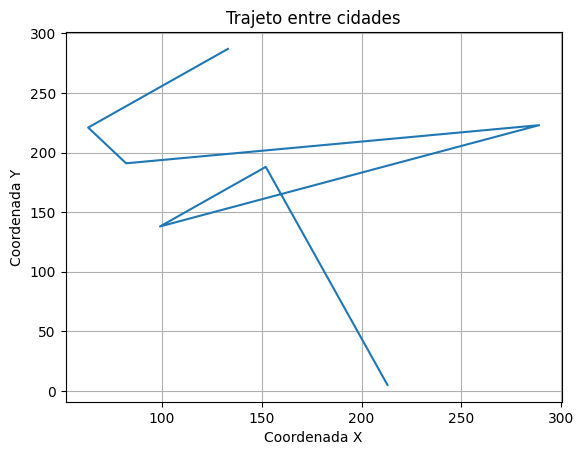

In [4]:
#Plotando as cidades e um possível trajeto entre elas
x = [CIDADES[cidade][0] for cidade in CIDADES]
y = [CIDADES[cidade][1] for cidade in CIDADES]
plt.plot(x,y)
plt.grid()
plt.title("Trajeto entre cidades")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")

In [5]:
cria_candidato_caixeiro(CIDADES)

['Cidade 5',
 'Cidade 1',
 'Cidade 4',
 'Cidade 6',
 'Cidade 3',
 'Cidade 0',
 'Cidade 2']

In [6]:
# Definindo parâmetros que serão utilizados no algoritmo genético
TAMANHO_POPULACAO = 100
NUM_GERACOES = 500
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

In [7]:
#Criando a população
POPULACAO = populacao_caixeiro(TAMANHO_POPULACAO, CIDADES)
print(POPULACAO)

[['Cidade 4', 'Cidade 6', 'Cidade 1', 'Cidade 5', 'Cidade 0', 'Cidade 2', 'Cidade 3'], ['Cidade 6', 'Cidade 2', 'Cidade 5', 'Cidade 0', 'Cidade 1', 'Cidade 4', 'Cidade 3'], ['Cidade 4', 'Cidade 5', 'Cidade 3', 'Cidade 0', 'Cidade 6', 'Cidade 2', 'Cidade 1'], ['Cidade 2', 'Cidade 0', 'Cidade 3', 'Cidade 5', 'Cidade 6', 'Cidade 4', 'Cidade 1'], ['Cidade 1', 'Cidade 4', 'Cidade 5', 'Cidade 2', 'Cidade 0', 'Cidade 3', 'Cidade 6'], ['Cidade 6', 'Cidade 3', 'Cidade 1', 'Cidade 4', 'Cidade 5', 'Cidade 2', 'Cidade 0'], ['Cidade 0', 'Cidade 1', 'Cidade 2', 'Cidade 6', 'Cidade 3', 'Cidade 4', 'Cidade 5'], ['Cidade 4', 'Cidade 2', 'Cidade 1', 'Cidade 3', 'Cidade 6', 'Cidade 0', 'Cidade 5'], ['Cidade 0', 'Cidade 5', 'Cidade 3', 'Cidade 6', 'Cidade 1', 'Cidade 4', 'Cidade 2'], ['Cidade 6', 'Cidade 5', 'Cidade 2', 'Cidade 1', 'Cidade 4', 'Cidade 0', 'Cidade 3'], ['Cidade 4', 'Cidade 0', 'Cidade 5', 'Cidade 3', 'Cidade 1', 'Cidade 2', 'Cidade 6'], ['Cidade 2', 'Cidade 5', 'Cidade 0', 'Cidade 1', 'Cid

In [8]:
# Define a função objetivo, que será a função_objetivo_pop_caixeiro com o argumento cidades fixado
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)

In [9]:
hall_da_fama = []

for geracao in range(NUM_GERACOES):

    #Seleção
    fitness = funcao_objetivo(POPULACAO)
    selecionados = selecao_torneio_min(POPULACAO, fitness, TAMANHO_TORNEIO)

    #Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamento_ordenado(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)

    #Mutação 1
    mutacao_troca(POPULACAO, CHANCE_DE_MUTACAO)
    
    #Mutação 2
    mutacao_permutacao(POPULACAO, CHANCE_DE_MUTACAO)

    #Atualização do Hall da Fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])   

    #Encerramento
    populacao = proxima_geracao

In [10]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 5', 'Cidade 4', 'Cidade 2', 'Cidade 0', 'Cidade 3', 'Cidade 1', 'Cidade 6'] com distância: 835.6245093254139


### 💡 **Analisando os resultados** 

Através desse código, aplicamos diferentes estratégias de mutação para o problema do caixeiro viajante.Como não podemos passar pela mesma cidade mais de uma vez no problema do caixeiro viajante, precisamos garantir que a mutação não irá gerar indivíduos inválidos para o problema. Nesse sentido, utilizamos as mutações de troca e permutação. Na mutação de troca, um gene do indivíduo é trocado por outro gene sorteado dentro do range de indivíduos possíveis; caso esse gene já exista no indivíduo, o sorteio é realizado novamente até encontrarmos um indivíduo válido. Já na permutação, os genes do indivíduo são embaralhados, mantendo os mesmos genes, mas alterando a ordem. O código convergiu para a solução do problema, o que demonstra que o algoritmo funciona de forma eficiente.

----
### 📚 Referências:

OPENAI. ChatGPT (versão GPT-4) [programa de computador]. Disponível em: <https://chatgpt.com/share/682cde5d-7b40-8005-94ca-adf39839902d>. Acesso em: 20 maio 2025.